In [1]:
# !/usr/bin/env python3

#cd ~/Desktop/snet/gits/lang-learn-repo/alex_tests

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import sys  
import subprocess
import pywt as pywt

from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

In [2]:
path = '~/Desktop/snet/gits/lang-learn-repo/alex_tests/data'
filenames = ['data11']
#dims = 3
#blocks = 3
limit = .95

In [3]:
def pcaSymbolize(df,dim=3,block=3):
    #divs = blocks**dim
    out = df.copy()
    minO = df.copy()
    maxO = df.copy()
    
    for v in out.columns:
        minO[v] = min(out[v])
        maxO[v] = max(out[v])
        out[v] = (out[v]-minO[v])/(maxO[v]-minO[v])
        
    out['sym']="R"
    out['num']=0
    
    ##Old logic
    #for d in range(dim):
    #    out['sym'+str(d)]=0
    #    for b in range(block):
    #        out.loc[out.loc[:,out.columns[d]]>(b+1)/float(block),'sym'+str(d)]=b+1
            
    for d in range(dim):
        out['sym'+str(d)]=0
        for b in range(block):
            out.loc[out.loc[:,out.columns[d]]>out.quantile((b+1)/float(block))[out.columns[d]],'sym'+str(d)]=b+1
    
    for c in range(dim):
        out['num']=out['num']+out['sym'+str(c)]*(block**(dim-c-1))
    out['sym']=out['sym']+out['num'].astype(str)
    
    return out,minO,maxO
            

In [4]:
def pcaSymbolizeTest(df,minO,maxO,out2,dim=3,block=3):
    #divs = blocks**dim
    out = df.copy()
    
    for v in out.columns:
        out[v] = (out[v]-minO[v])/(maxO[v]-minO[v])
        
    out['sym']="R"
    out['num']=0
    
    ##Old logic
    #for d in range(dim):
    #    out['sym'+str(d)]=0
    #    for b in range(block):
    #        out.loc[out.loc[:,out.columns[d]]>(b+1)/float(block),'sym'+str(d)]=b+1
            
    for d in range(dim):
        out['sym'+str(d)]=0
        for b in range(block):
            out.loc[out.loc[:,out.columns[d]]>out2.quantile((b+1)/float(block))[out2.columns[d]],'sym'+str(d)]=b+1
    
    for c in range(dim):
        out['num']=out['num']+out['sym'+str(c)]*(block**(dim-c-1))
    out['sym']=out['sym']+out['num'].astype(str)
    
    return out
            

In [5]:
def pcaPlot(df,dim=3):
    out = df.copy()
    
    for v in out.columns:
        out[v] = (out[v]-min(out[v]))/(max(out[v])-min(out[v]))
        
    if dim==3:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(out[out.columns[0]], out[out.columns[1]], out[out.columns[2]], c=out[out.columns[-1]], cmap='coolwarm');

In [6]:
def pcaPlotTest(df,minO,maxO,dim=3):
    out = df.copy()
    
    for v in out.columns[:-1]:
        out[v] = (out[v]-minO[v])/(maxO[v]-minO[v])
        
    if dim==3:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.set_zlim([0,1])
        ax.scatter3D(out[out.columns[0]], out[out.columns[1]], out[out.columns[2]], c=out[out.columns[-1]], cmap='coolwarm');

0
1
2
3
4
5
6
-7


,sym0,sym1,sym2,sym3,sym4,sym5,sym6
0,R100,R0,R124,R19,R22,R124,R65
1,R100,R0,R121,R19,R22,R124,R65
2,R100,R0,R111,R19,R22,R124,R65
3,R100,R0,R106,R19,R22,R124,R65
4,R100,R1,R111,R19,R22,R121,R65
5,R100,R0,R111,R19,R22,R105,R65
6,R100,R0,R111,R19,R22,R105,R65
7,R100,R0,R111,R19,R23,R105,R66
8,R100,R0,R111,R19,R22,R105,R65
9,R100,R1,R106,R19,R24,R105,R74


anomaly:		 24
Index(['R119', 'R120', 'R121', 'R122', 'R124', 'R13', 'R14', 'R2', 'R27', 'R3',
       'R32', 'R38', 'R39', 'R4', 'R43', 'R44', 'R55', 'R67', 'R68', 'R80',
       'R85', 'R9', 'R92', 'R97'],
      dtype='object', name='sym0')
nonanomaly:		 13
Index(['R100', 'R101', 'R103', 'R104', 'R109', 'R27', 'R32', 'R37', 'R56',
       'R61', 'R62', 'R85', 'R86'],
      dtype='object', name='sym0')
------------------------------------------------------
anomaly:		 28
Index(['R1', 'R11', 'R110', 'R111', 'R112', 'R114', 'R119', 'R3', 'R35', 'R36',
       'R38', 'R39', 'R43', 'R44', 'R47', 'R48', 'R49', 'R6', 'R65', 'R66',
       'R70', 'R72', 'R73', 'R8', 'R82', 'R86', 'R87', 'R95'],
      dtype='object', name='sym1')
nonanomaly:		 14
Index(['R0', 'R1', 'R102', 'R105', 'R106', 'R107', 'R110', 'R77', 'R78', 'R79',
       'R82', 'R83', 'R84', 'R89'],
      dtype='object', name='sym1')
------------------------------------------------------
anomaly:		 24
Index(['R102', 'R103', 'R106', 'R111'

,sym0,sym1,sym2,sym3,sym4,sym5,sym6
576,R55,R144,R102,R7,R107,R78,R11
577,R55,R144,R102,R7,R107,R78,R11
578,R55,R144,R102,R7,R107,R84,R11
579,R55,R144,R102,R7,R84,R84,R49
580,R55,R144,R102,R7,R108,R78,R11
581,R55,R144,R102,R7,R108,R84,R12
582,R55,R144,R102,R7,R108,R78,R7
583,R55,R144,R102,R7,R108,R84,R7
584,R55,R144,R102,R7,R107,R109,R32
585,R55,R144,R102,R7,R84,R84,R19


anomaly:		 5
Index(['R0', 'R55', 'R80', 'R85', 'R90'], dtype='object', name='sym0')
nonanomaly:		 2
Index(['R85', 'R90'], dtype='object', name='sym0')
------------------------------------------------------
anomaly:		 14
Index(['R0', 'R136', 'R140', 'R141', 'R143', 'R144', 'R145', 'R146', 'R147',
       'R148', 'R150', 'R151', 'R152', 'R153'],
      dtype='object', name='sym1')
nonanomaly:		 5
Index(['R145', 'R147', 'R148', 'R152', 'R153'], dtype='object', name='sym1')
------------------------------------------------------
anomaly:		 9
Index(['R0', 'R100', 'R101', 'R102', 'R103', 'R104', 'R76', 'R77', 'R82'], dtype='object', name='sym2')
nonanomaly:		 5
Index(['R103', 'R104', 'R76', 'R77', 'R82'], dtype='object', name='sym2')
------------------------------------------------------
anomaly:		 5
Index(['R0', 'R5', 'R6', 'R7', 'R8'], dtype='object', name='sym3')
nonanomaly:		 3
Index(['R6', 'R7', 'R8'], dtype='object', name='sym3')
------------------------------------------------------
anom

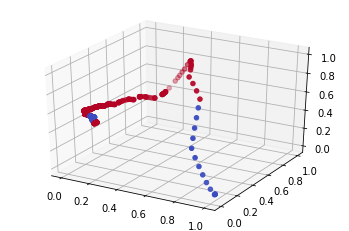

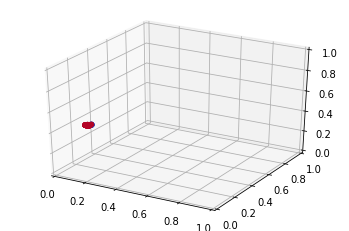

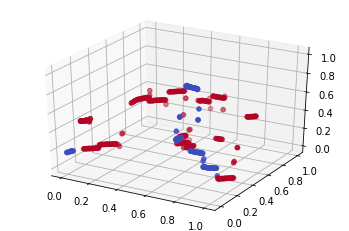

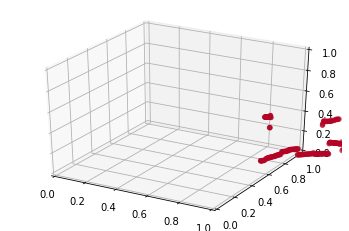

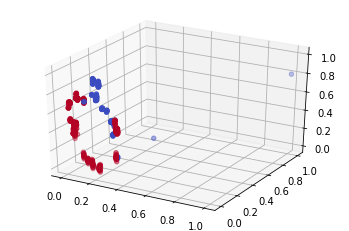

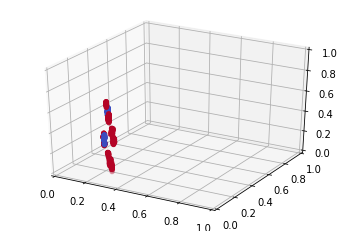

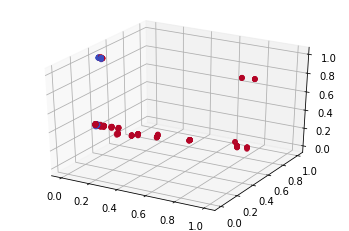

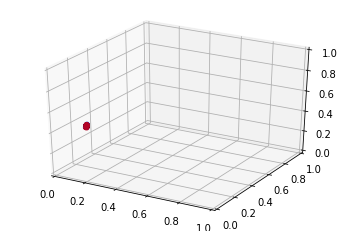

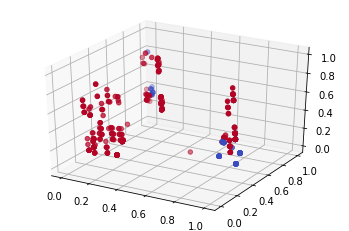

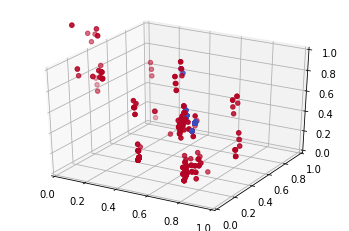

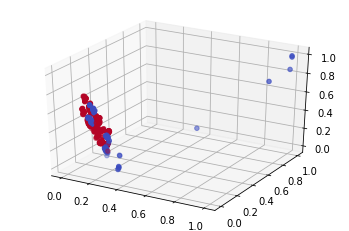

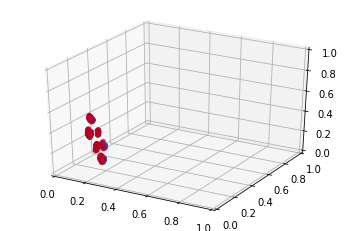

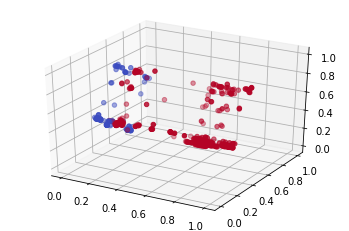

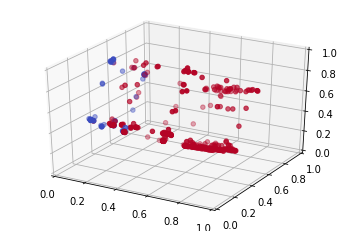

In [7]:
for filename in filenames:
    #filename = filenames[0]
    doc = pd.read_csv(path+"/"+filename+"/"+filename+".csv") 
    clst = pd.read_csv(path+"/"+filename+"/"+filename+"_clusters.csv")

    dataT = doc.copy()

    for v in dataT.columns:
        dataT[v] = (dataT[v]-min(dataT[v]))/(max(dataT[v])-min(dataT[v]))

    dataT = dataT.replace(np.nan,0)
    dataT1 = dataT.iloc[:int(len(dataT)/2),:]
    dataT2 = dataT.iloc[int(len(dataT)/2):,:]
    
    dataTest1 = dataT1.T
    dataTest1 = dataTest1.iloc[:-1,:]
    dataTest1['clst']=list(clst['cluster'])
    
    dataTest2 = dataT2.T
    dataTest2 = dataTest2.iloc[:-1,:]
    dataTest2['clst']=list(clst['cluster'])
    
    data = dataTest1

    for c in range(max(data['clst'])+1):
        print(c)
        sub = data.loc[data.loc[:,'clst']==c,data.columns[:-1]]
        sub = sub.T
        
        #Fitting the PCA algorithm with our Data
        pcaT = PCA().fit(sub)
        #plt.figure()
        #plt.plot(np.cumsum(pcaT.explained_variance_ratio_))
        varsum = pd.DataFrame(np.cumsum(pcaT.explained_variance_ratio_))
        dims = min(10,max(3,len(varsum.loc[limit>varsum.loc[:,0],0])))
        blocks = max(3,min(10,int(50/dims)))
        dims = 3
        blocks = 5
        
        #plt.xlabel('Number of Components')
        #plt.ylabel('Variance (%)') #for each component
        #plt.xlim(0,dims+1)
        #plt.title('Pulsar Dataset Explained Variance')
        #plt.show()
        
        #----------------------------------TRAINING PCA--------------------------------
        pca = PCA(n_components=dims)
        pca.fit(sub)
        newSubs = pca.transform(sub)
        newSubs = pd.DataFrame(newSubs)
        newSub,minO,maxO = pcaSymbolize(newSubs,dims,blocks)

        data = data.T
        data['sym'+str(c)]=0
        data.loc[:len(newSub['sym']),'sym'+str(c)]=list(newSub['sym'])
        data = data.T

        subput = newSubs.copy()
        subput['anomaly']=list(doc.loc[:int(len(doc['anomaly'])/2)-1,'anomaly'])
        pcaPlot(subput)
        #----------------------------------TESTING PCA--------------------------------
        sub = dataTest2.loc[dataTest2.loc[:,'clst']==c,dataTest2.columns[:-1]]
        sub = sub.T
        newSubs = pca.transform(sub)
        newSubs = pd.DataFrame(newSubs)
        newSub = pcaSymbolizeTest(newSubs,minO,maxO,newSub,dims,blocks)

        dataTest2 = dataTest2.T
        dataTest2['sym'+str(c)]=0
        dataTest2.loc[:len(newSub['sym']),'sym'+str(c)]=list(newSub['sym'])
        dataTest2 = dataTest2.T

        subput = newSubs.copy()
        subput['anomaly']=list(doc.loc[int(len(doc['anomaly'])/2):,'anomaly'])
        pcaPlotTest(subput,minO,maxO)
        #pcaPlot(subput)
        #display(subput['anomaly'].describe())
        
     #----------------------------------TRAINING PCA--------------------------------
    output = data.T
    lim = -int(max(data['clst'])+1)
    print(lim)
    output = output.loc[output.index[:-1],output.columns[lim:]]
    display(output)

    #output.to_csv(path+"/"+filename+"/"+filename+"_PCA_"+str(dims)+"_"+str(blocks)+".csv",index=False) 
    output['anomaly']=list(doc.loc[:int(len(doc['anomaly'])/2)-1,'anomaly'])
    outSY = output[output['anomaly']==1]
    outSN = output[output['anomaly']==0]
    
    for n in range(len(outSY.columns)):
        groupAns = outSY.groupby(by=outSY.columns[n]).count().iloc[:,0].index
        print('anomaly:\t\t',len(groupAns))
        print(groupAns)
        groupNons = outSN.groupby(by=outSN.columns[n]).count().iloc[:,0].index
        print('nonanomaly:\t\t',len(groupNons))
        print(groupNons)
        #print('non anomaly\t\t',len(groupNons))
        #print("\ndiffs")
        listG = list(groupAns)+list(groupNons)
        setG = set(listG)
        #print("total with rep:\t\t",len(listG))
        #print("total without rep:\t",len(setG))
        #print("rep:\t\t\t",len(listG)-len(setG))
        #print("rep%:\t\t\t",100*(len(listG)-len(setG))/min(len(groupAns),len(groupNons)),'%')
        #print("rep%:\t\t\t",100*(1-(len(listG)-len(setG))/len(setG)),'%')
        print('------------------------------------------------------')
        
     #----------------------------------TESTING PCA--------------------------------
    output = dataTest2.T
    lim = -int(max(dataTest2['clst'])+1)
    print(lim)
    output = output.loc[output.index[:-1],output.columns[lim:]]
    display(output)

    #output.to_csv(path+"/"+filename+"/"+filename+"_PCA_"+str(dims)+"_"+str(blocks)+".csv",index=False) 
    output['anomaly']=list(doc.loc[int(len(doc['anomaly'])/2):,'anomaly'])
    outSY = output[output['anomaly']==1]
    outSN = output[output['anomaly']==0]
    
    for n in range(len(outSY.columns)):
        groupAns = outSY.groupby(by=outSY.columns[n]).count().iloc[:,0].index
        print('anomaly:\t\t',len(groupAns))
        print(groupAns)
        groupNons = outSN.groupby(by=outSN.columns[n]).count().iloc[:,0].index
        print('nonanomaly:\t\t',len(groupNons))
        print(groupNons)
        #print('non anomaly\t\t',len(groupNons))
        #print("\ndiffs")
        listG = list(groupAns)+list(groupNons)
        setG = set(listG)
        #print("total with rep:\t\t",len(listG))
        #print("total without rep:\t",len(setG))
        #print("rep:\t\t\t",len(listG)-len(setG))
        #print("rep%:\t\t\t",100*(len(listG)-len(setG))/min(len(groupAns),len(groupNons)),'%')
        #print("rep%:\t\t\t",100*(1-(len(listG)-len(setG))/len(setG)),'%')
        print('------------------------------------------------------')
    
    